# Курсовой проект для курса "Python для Data Science"
**Автор**: Кабанов Сергей

**Материалы к проекту (файлы)**:  
train.csv  
test.csv

**Задание**:  
Используя данные из train.csv, построить модель для предсказания цен на недвижимость (квартиры). С помощью полученной модели предсказать цены для квартир из файла test.csv.

**Целевая переменная**:  
Price

**Основная метрика**:  
R2 - коэффициент детерминации (sklearn.metrics.r2_score)

**Вспомогательная метрика**:  
MSE - средняя квадратичная ошибка (sklearn.metrics.mean_squared_error)

**Сдача проекта**:
1. Прислать в раздел Задания Урока 12 ("Вебинар. Консультация по итоговому проекту") ссылку на программу в github (программа должна содержаться в файле Jupyter Notebook с расширением ipynb).
2. Приложить файл с названием по образцу SShirkin_predictions.csv с предсказанными ценами для квартир из test.csv (файл должен содержать два поля: Id, Price).

**Сроки сдачи**:
Сдать проект за 72 часа до начала Урока 13 ("Вебинар. Результаты итоговых проектов и закрытие курса").

**Примечание**:
Все файлы csv должны содержать названия полей (header - то есть "шапку"), разделитель - запятая. В файлах не должны содержаться индексы из датафрейма.

## План работы:
1. Подготовка окружения
2. Загрузка данных
3. Первичный анализ
4. Первичная очистка данных
5. Первичная модель и базовая оценка
6. Очистка данных.
7. Конструирование признаков
8. Обучение моделей и выбор лучшей
9. Итоговое предсказание

## Подготовка окружения

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

RANDOM_STATE = 427

TRAIN_DATA_FILE = 'train.csv'
TEST_DATA_FILE = 'test.csv'

## Загрузка данных

In [2]:
data_train = pd.read_csv(TRAIN_DATA_FILE)
data_test = pd.read_csv(TEST_DATA_FILE)

## Первичный анализ

In [3]:
data_train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
data_test.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,725,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,15856,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,5480,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,15664,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,14275,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [5]:
data_train.shape, data_test.shape

((10000, 20), (5000, 19))

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [7]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
Id               5000 non-null int64
DistrictId       5000 non-null int64
Rooms            5000 non-null float64
Square           5000 non-null float64
LifeSquare       3959 non-null float64
KitchenSquare    5000 non-null float64
Floor            5000 non-null int64
HouseFloor       5000 non-null float64
HouseYear        5000 non-null int64
Ecology_1        5000 non-null float64
Ecology_2        5000 non-null object
Ecology_3        5000 non-null object
Social_1         5000 non-null int64
Social_2         5000 non-null int64
Social_3         5000 non-null int64
Healthcare_1     2623 non-null float64
Helthcare_2      5000 non-null int64
Shops_1          5000 non-null int64
Shops_2          5000 non-null object
dtypes: float64(7), int64(9), object(3)
memory usage: 742.3+ KB


In [8]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,10000.0,8383.407700,4859.019020,0.000000,4169.500000,8394.500000,12592.500000,1.679800e+04
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01


In [9]:
data_test.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,5000.0,8412.595400,4832.674037,1.000000,4221.750000,8320.500000,12598.250000,16795.000000
DistrictId,5000.0,51.279200,44.179466,0.000000,21.000000,37.000000,77.000000,212.000000
Rooms,5000.0,1.910000,0.838594,0.000000,1.000000,2.000000,2.000000,17.000000
Square,5000.0,56.449500,19.092787,1.378543,41.906231,52.921340,66.285129,223.453689
LifeSquare,3959.0,36.158810,17.825287,0.333490,23.092026,32.925087,45.174091,303.071094
KitchenSquare,5000.0,5.976800,9.950018,0.000000,1.000000,6.000000,9.000000,620.000000
Floor,5000.0,8.632000,5.483228,1.000000,4.000000,7.000000,12.000000,78.000000
HouseFloor,5000.0,12.601000,6.789213,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,5000.0,1984.392600,18.573149,1908.000000,1973.000000,1977.000000,2000.000000,2020.000000
Ecology_1,5000.0,0.119874,0.120070,0.000000,0.019509,0.072158,0.195781,0.521867


Пропущенные значения в полях LifeSquare и Healthcare_1 - уберем эти поля из первичной модели.

Нечисловые признаки так же уберем из первичной модели.

Явная опечатка в поле HouseYear (20052011 -> 2008) - исправить вручную.

Явная опечатка в поле KitchenSquare (2014 -> 6) - исправить вручную.

Явная опечатка в поле HouseFloor (117 -> 17) - исправить вручную.

## Первичная очистка данных

In [10]:
data_train[data_train.HouseYear > 2020]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1497,10814,109,1.0,37.265070,20.239714,9.0,9,12.0,20052011,0.136330,B,B,30,6141,10,262.0,3,6,B,254084.534396
4189,11607,147,2.0,44.791836,28.360393,5.0,4,9.0,4968,0.319809,B,B,25,4756,16,2857.0,5,8,B,243028.603096


In [11]:
data_train.loc[data_train['Id'] == 10814, 'HouseYear'] = 2008

In [12]:
data_train.loc[data_train['Id'] == 11607, 'HouseYear'] = 1968

In [13]:
data_train[data_train.KitchenSquare == 2014]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1064,14656,62,1.0,47.100719,46.44796,2014.0,4,1.0,2014,0.072158,B,B,2,629,1,NaN,0,0,A,108337.484207


In [14]:
# заменим на медиану
data_train.loc[data_train['Id'] == 14656, 'KitchenSquare'] = 6

In [15]:
data_train[data_train.HouseFloor == 117]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
8854,78,30,2.0,65.773749,66.811789,1.0,8,117.0,1977,0.000078,B,B,22,6398,141,1046.0,3,23,B,207248.37052


In [16]:
data_train.loc[data_train['Id'] == 78, 'HouseFloor'] = 17

## Первичная модель и базовая оценка

In [17]:
# Для первичной оценки попробуем линейную регрессию и случайный лес
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestRegressor as RF

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
data_train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [20]:
# убираем 'Id', 'LifeSquare', 'Ecology_2', 'Ecology_3', 'Healthcare_1', 'Shops_2'
features = [
    'DistrictId', 'Rooms', 'Square', 'KitchenSquare',
    'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 
    'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1'
]


target = ['Price']

In [21]:
X = pd.DataFrame(data_train[features], columns=features)
y = data_train[target]

In [22]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)

In [23]:
lr = LR()
lr.fit(X_train, y_train)
lr_y_pred = lr.predict(X_valid)

In [24]:
rf = RF(n_estimators=100, max_depth=10, random_state=RANDOM_STATE)
rf.fit(X_train, y_train.values.ravel())
rf_y_pred = rf.predict(X_valid)

In [25]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

In [26]:
r2(y_valid, lr_y_pred), mse(y_valid, lr_y_pred)

(0.433394135427562, 4787232538.853286)

In [27]:
r2(y_valid, rf_y_pred), mse(y_valid, rf_y_pred)

(0.7224557243812948, 2344961586.6876817)

In [28]:
init_r2, init_mse = r2(y_valid, rf_y_pred), mse(y_valid, rf_y_pred)

In [29]:
pd.DataFrame(rf.feature_importances_, columns=['importance'], index=features).sort_values(by=['importance'], ascending=False)

,importance
Square,0.430607
Social_2,0.131734
Rooms,0.091537
Social_1,0.081802
Social_3,0.059196
DistrictId,0.044921
Ecology_1,0.037428
HouseYear,0.030412
KitchenSquare,0.024166
Floor,0.024084


## Очистка данных

### Square

In [30]:
data_train['Square'].describe()

count    10000.000000
mean        56.315775
std         21.058732
min          1.136859
25%         41.774881
50%         52.513310
75%         65.900625
max        641.065193
Name: Square, dtype: float64

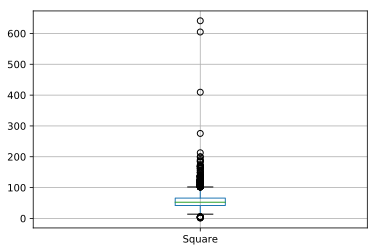

In [31]:
data_train[['Square']].plot.box()
# plt.yticks(np.arange(0, 20, step=1))
plt.grid()

Четыре сильных выброса (>250), посмотрим на них:

In [32]:
data_train.loc[data_train['Square'] > 250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1982,5548,86,5.0,275.645284,233.949309,26.0,12,37.0,2011,0.161976,B,A,31,7010,5,4508.0,3,7,B,455264.882666
4262,28,9,2.0,604.705972,NaN,1.0,17,18.0,1977,0.161532,B,B,25,5648,1,30.0,2,4,B,187717.242538
4690,2307,102,1.0,409.425181,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,641.065193,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562


Для трех из них площадь похоже завышена в 10 раз. Исправим это вручную.

In [33]:
data_train.loc[data_train['Id'].isin([28, 2307, 11602]), 'Square'] = \
                                                        data_train.loc[data_train['Id'].isin([28, 2307, 11602]), 'Square'] / 10

In [34]:
data_train.loc[data_train['Square'] < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261


Что делать с такими площадями пока не ясно. Так же видны проблемы по кол-ву комнат. Такие значения будем в дальнейшем заменять усредненными.

### Rooms

In [35]:
data_train['Rooms'].describe()

count    10000.000000
mean         1.890500
std          0.839512
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         19.000000
Name: Rooms, dtype: float64

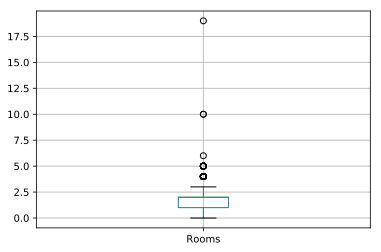

In [36]:
data_train[['Rooms']].plot.box()
# plt.yticks(np.arange(0, 20, step=1))
plt.grid()

In [37]:
data_train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

Квартиры с 6, 10, 19 комнатами попробуем поправить вручную

In [38]:
data_train.loc[data_train['Rooms'].isin([6, 10, 19])]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
377,5927,57,10.0,59.056975,36.223072,10.0,22,22.0,2002,0.090799,B,B,74,19083,2,NaN,5,15,B,317265.323792
1454,8491,1,19.0,42.006046,21.779288,7.0,17,17.0,2014,0.007122,B,B,1,264,0,NaN,0,1,B,78364.616704
2170,14003,99,6.0,59.414334,38.702244,6.0,7,9.0,1969,0.033494,B,B,66,10573,1,1322.0,3,8,B,229661.964416
8849,14865,9,10.0,60.871266,38.420681,10.0,3,2.0,1994,0.161532,B,B,25,5648,1,30.0,2,4,B,172329.270863


In [39]:
data_train.loc[data_train['Id'].isin([5927,14003,14865]), 'Rooms'] = 2

data_train.loc[data_train['Id'] == 8491, 'Rooms'] = 1

In [40]:
data_train.loc[data_train['Rooms'] == 0]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
1397,12638,27,0.0,138.427694,136.215499,0.0,4,3.0,2016,0.075424,B,B,11,3097,0,NaN,0,0,B,268394.744389
1981,7917,27,0.0,212.932361,211.231125,0.0,2,3.0,2008,0.211401,B,B,9,1892,0,NaN,0,1,B,302211.260887
2269,7317,27,0.0,41.790881,NaN,0.0,13,0.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,98129.976788
3911,770,28,0.0,49.483501,NaN,0.0,16,0.0,2015,0.118537,B,B,30,6207,1,1183.0,1,0,B,217009.338463
4366,456,6,0.0,81.491446,NaN,0.0,4,0.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,212864.799112
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
6149,3159,88,0.0,38.697117,19.345131,9.0,9,16.0,1982,0.127376,B,B,43,8429,3,NaN,3,9,B,158998.110646
8834,9443,27,0.0,87.762616,85.125471,0.0,5,15.0,1977,0.211401,B,B,9,1892,0,NaN,0,1,B,219281.918007


### LifeSquare

In [41]:
data_train['LifeSquare'].describe()

count    7887.000000
mean       37.199645
std        86.241209
min         0.370619
25%        22.769832
50%        32.781260
75%        45.128803
max      7480.592129
Name: LifeSquare, dtype: float64

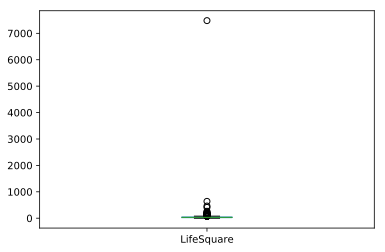

In [42]:
data_train['LifeSquare'].plot.box();

Уберем явный выброс

In [43]:
data_train.loc[data_train['LifeSquare'] > 1000]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
4328,16550,27,3.0,81.694417,7480.592129,1.0,9,17.0,2016,0.017647,B,B,2,469,0,NaN,0,0,B,217357.492366


In [44]:
data_train.loc[data_train['Id'] == 16550, 'LifeSquare'] = data_train.loc[data_train['Id'] == 16550, 'LifeSquare'] / 100

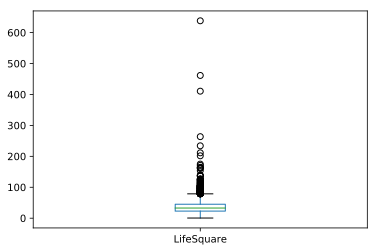

In [45]:
data_train['LifeSquare'].plot.box();

LifeSquare должна быть ментше чем Square. Все что больше 250 явные аномалии.

In [46]:
data_train.loc[data_train['LifeSquare'] > 250]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
590,14990,23,2.0,48.449873,263.542020,5.0,6,5.0,1972,0.075779,B,B,6,1437,3,NaN,0,2,B,141780.231857
4690,2307,102,1.0,40.942518,410.639749,10.0,4,4.0,2016,0.238617,B,B,26,3889,6,705.0,3,6,B,90470.430830
6977,11602,30,2.0,64.106519,638.163193,10.0,20,19.0,2019,0.000078,B,B,22,6398,141,1046.0,3,23,B,133529.681562
8437,15886,85,3.0,78.059331,461.463614,10.0,12,16.0,1998,0.037178,B,B,52,11217,1,2300.0,1,7,B,394253.299978


Уменьшим LifeSquare таких квартир в 10 раз

In [47]:
data_train.loc[data_train['Id'].isin([14990,2307,11602,15886]), 'LifeSquare'] = \
                                              data_train.loc[data_train['Id'].isin([14990,2307,11602,15886]), 'LifeSquare'] / 10

In [48]:
data_train.loc[data_train['LifeSquare'] < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
26,4378,27,3.0,106.958871,0.641822,0.0,17,0.0,2018,0.072158,B,B,2,629,1,NaN,0,0,A,337299.867936
95,4280,34,2.0,61.334968,4.091945,1.0,26,1.0,2014,0.069753,B,B,53,13670,4,NaN,1,11,B,286564.441972
134,12613,6,2.0,65.496674,5.589324,1.0,5,17.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,180727.643541
158,16779,27,3.0,51.991064,4.896202,1.0,22,25.0,1977,0.072158,B,B,2,629,1,NaN,0,0,A,174687.566186
160,3522,6,1.0,66.419841,3.987101,1.0,2,1.0,1977,0.243205,B,B,5,1564,0,540.0,0,0,B,193361.229815
219,5354,85,1.0,28.535084,12.733642,6.0,4,9.0,1967,0.037178,B,B,52,11217,1,2300.0,1,7,B,142269.268090
270,15215,17,1.0,46.692974,5.941401,1.0,7,1.0,2015,0.000000,B,B,18,3374,5,620.0,1,2,B,212290.684086
279,8727,1,2.0,79.521221,4.634049,1.0,5,1.0,2017,0.007122,B,B,1,264,0,NaN,0,1,B,232726.628137
363,15751,9,1.0,44.171793,1.251846,1.0,11,18.0,2017,0.161532,B,B,25,5648,1,30.0,2,4,B,134910.715588
475,6333,27,2.0,64.049695,4.008230,1.0,5,5.0,2017,0.017647,B,B,2,469,0,NaN,0,0,B,189477.560210


LifeSquare для таких квартир будем расчитывать исходя из Square

### Social_2

In [49]:
data_train['Social_2'].describe()

count    10000.000000
mean      5352.157400
std       4006.799803
min        168.000000
25%       1564.000000
50%       5285.000000
75%       7227.000000
max      19083.000000
Name: Social_2, dtype: float64

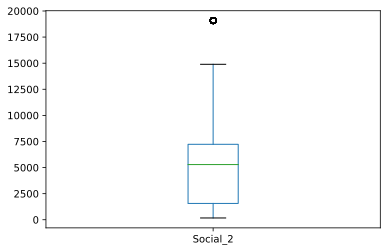

In [50]:
data_train['Social_2'].plot.box();

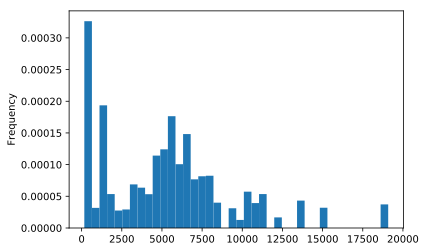

In [59]:
data_train['Social_2'].plot.hist(density=1, bins=40);

Аномалий не видно

### Social_1

In [60]:
data_train['Social_1'].describe()

count    10000.000000
mean        24.687000
std         17.532614
min          0.000000
25%          6.000000
50%         25.000000
75%         36.000000
max         74.000000
Name: Social_1, dtype: float64

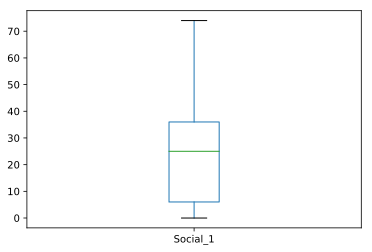

In [62]:
data_train['Social_1'].plot.box();

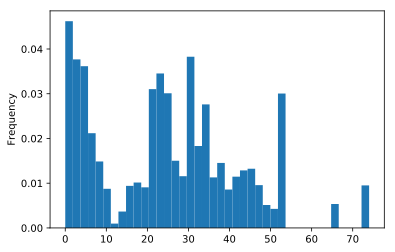

In [63]:
data_train['Social_1'].plot.hist(density=1, bins=40);

Аномалий не видно

### Расчет статистики для заполнения пустых и аномальных значений

Попробуем расчитать статистику для нормальных квартир по площади в разрезе района, и кол-ва комнат.

In [54]:
data_train.loc[data_train['Square'].between(15, 250), 'Rooms'].value_counts()

2.0    3882
1.0    3698
3.0    2232
4.0     150
5.0      17
0.0       7
Name: Rooms, dtype: int64

In [55]:
stat_mean = data_train.loc[(data_train['Square'].between(15, 250)) & (data_train['Rooms'].between(1, 5))]\
                                                        .groupby(by=['DistrictId', 'Rooms'], as_index=False).mean()

stat_mean = stat_mean.drop(['Id'], axis=1)

stat_mean.columns = list(stat_mean.columns[0:2]) + [new_col + '_mean' for new_col in stat_mean.columns[2:]]

In [56]:
stat_mean

,DistrictId,Rooms,Square_mean,LifeSquare_mean,KitchenSquare_mean,Floor_mean,HouseFloor_mean,HouseYear_mean,Ecology_1_mean,Social_1_mean,Social_2_mean,Social_3_mean,Healthcare_1_mean,Helthcare_2_mean,Shops_1_mean,Price_mean
0,0,1.0,40.786048,24.147304,6.285714,7.285714,11.142857,1985.476190,2.002919e-01,26.904762,4957.523810,9.904762,2014.333333,5.380952,7.238095,141262.601991
1,0,2.0,56.156014,32.989944,7.117647,5.823529,11.941176,1981.117647,2.090800e-01,26.764706,4942.705882,10.352941,2076.294118,5.352941,7.294118,197998.146681
2,0,3.0,80.723533,48.134569,9.300000,7.400000,14.500000,1992.100000,2.256894e-01,26.500000,4914.700000,11.200000,2193.400000,5.300000,7.400000,304170.518823
3,1,1.0,43.765810,33.295941,2.614786,10.062257,16.319066,1985.863813,8.699128e-03,2.852140,560.334630,0.031128,231.111111,0.178988,0.984436,147053.553961
4,1,2.0,63.012206,48.444299,2.754717,10.675472,16.815094,1985.498113,9.255441e-03,3.192453,614.724528,0.037736,229.565217,0.215094,1.000000,198777.278269
5,1,3.0,82.773310,66.720688,2.921260,10.629921,16.653543,1984.086614,9.842979e-03,3.748031,706.771654,0.055118,226.666667,0.275591,0.984252,246330.217412
6,1,4.0,99.893009,67.345083,10.000000,4.000000,17.000000,1999.000000,3.627009e-02,6.000000,1318.000000,1.000000,200.000000,1.000000,1.000000,277290.705058
7,2,1.0,37.989846,20.673249,7.038462,5.769231,9.769231,1975.692308,1.390049e-01,36.576923,8460.000000,3.961538,1395.263158,0.730769,5.730769,177871.758149
8,2,2.0,54.385598,33.618528,7.323529,6.941176,10.411765,1976.147059,1.178230e-01,36.264706,8480.558824,3.970588,1327.727273,0.941176,5.911765,243022.112038
9,2,3.0,76.290822,48.193050,12.352941,6.705882,11.588235,1979.823529,1.649544e-01,38.588235,8841.352941,4.470588,1645.294118,0.176471,5.294118,342699.342039


Исправим аномальные значения в поле Square

In [73]:
data_train.loc[data_train['Square'] < 15]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
212,1748,88,2.0,5.497061,67.628717,1.0,24,22.0,1977,0.127376,B,B,43,8429,3,NaN,3,9,B,412511.088764
1316,11526,27,1.0,4.633498,1.969969,1.0,18,1.0,1977,0.011654,B,B,4,915,0,NaN,0,0,B,107604.269441
1608,10202,6,1.0,2.596351,4.604943,1.0,3,25.0,2014,0.243205,B,B,5,1564,0,540.0,0,0,B,137597.601458
3280,10527,27,1.0,4.380726,40.805837,1.0,10,17.0,2013,0.211401,B,B,9,1892,0,NaN,0,1,B,97560.720383
3413,9487,5,1.0,5.129222,5.549458,1.0,1,1.0,1977,0.150818,B,B,16,3433,4,2643.0,4,5,B,369472.403061
4739,12676,81,3.0,13.784865,15.988889,7.0,4,5.0,1960,0.319809,B,B,25,4756,16,2857.0,5,8,B,78388.806186
4853,3224,27,0.0,2.377248,0.873147,0.0,1,0.0,1977,0.017647,B,B,2,469,0,NaN,0,0,B,126596.941798
4900,4504,27,3.0,4.390331,5.610772,1.0,8,19.0,2016,0.211401,B,B,9,1892,0,NaN,0,1,B,161379.067034
6392,14786,1,1.0,1.136859,4.525736,1.0,3,1.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,181434.825589
8030,13265,1,3.0,4.823679,79.767964,0.0,6,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,237716.681261


## Оценка модели на очищенных данных

## Конструирование признаков

In [118]:
# убираем 'Id', 'LifeSquare', 'Ecology_2', 'Ecology_3', 'Healthcare_1', 'Shops_2'
features = [
    'DistrictId', 'Rooms', 'Square', 'KitchenSquare',
    'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 
    'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Price'
]

In [119]:
X = pd.DataFrame(data_train[features], columns=features)

In [120]:
X_train, X_valid = train_test_split(X, test_size=0.3, random_state=RANDOM_STATE)

In [121]:
X_train.shape, X_valid.shape

((7000, 14), (3000, 14))

In [122]:
X_train_stats = X_train.loc[(X_train['Square'].between(15, 250)) & (X_train['Rooms'].between(1, 5))]\
                                                        .groupby(by=['DistrictId', 'Rooms'], as_index=False).mean()

# X_train_stats = stat_mean.drop(['Id'], axis=1)

X_train_stats.columns = list(stat_mean.columns[0:2]) + [new_col + '_mean' for new_col in X_train_stats.columns[2:]]

In [123]:
X_train = pd.merge(X_train, X_train_stats, on=['DistrictId', 'Rooms'], how='left')

In [132]:
X_valid = pd.merge(X_valid, X_train_stats, on=['DistrictId', 'Rooms'], how='left')

In [125]:
for col in [c for c in X_train.columns if '_mean' in c]:
    X_train[col] = X_train[col].fillna(X_train_stats[col].mean())

In [133]:
for col in [c for c in X_valid.columns if '_mean' in c]:
    X_valid[col] = X_valid[col].fillna(X_train_stats[col].mean())

In [126]:
X_train.columns

Index(['DistrictId', 'Rooms', 'Square', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Price', 'Square_mean', 'KitchenSquare_mean',
       'Floor_mean', 'HouseFloor_mean', 'HouseYear_mean', 'Ecology_1_mean',
       'Social_1_mean', 'Social_2_mean', 'Social_3_mean', 'Helthcare_2_mean',
       'Shops_1_mean', 'Price_mean'],
      dtype='object')

In [127]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,7000.0,50.687286,43.717704,0.000000,20.000000,37.000000,75.000000,208.000000
Rooms,7000.0,1.888429,0.811922,0.000000,1.000000,2.000000,2.000000,5.000000
Square,7000.0,56.127449,19.195471,1.988943,41.799966,52.473672,65.912854,275.645284
KitchenSquare,7000.0,6.195571,24.080861,0.000000,1.000000,6.000000,9.000000,1970.000000
Floor,7000.0,8.485286,5.239792,1.000000,4.000000,7.000000,12.000000,42.000000
HouseFloor,7000.0,12.587286,6.778839,0.000000,9.000000,12.000000,17.000000,99.000000
HouseYear,7000.0,1984.694571,18.464050,1912.000000,1973.000000,1977.000000,2001.000000,2020.000000
Ecology_1,7000.0,0.119380,0.119603,0.000000,0.017647,0.075779,0.195781,0.521867
Social_1,7000.0,24.572429,17.380471,0.000000,6.000000,25.000000,35.000000,74.000000
Social_2,7000.0,5306.521714,3952.878964,168.000000,1564.000000,5285.000000,7077.000000,19083.000000


In [131]:
X_train.columns

Index(['DistrictId', 'Rooms', 'Square', 'KitchenSquare', 'Floor', 'HouseFloor',
       'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3',
       'Helthcare_2', 'Shops_1', 'Price', 'Square_mean', 'KitchenSquare_mean',
       'Floor_mean', 'HouseFloor_mean', 'HouseYear_mean', 'Ecology_1_mean',
       'Social_1_mean', 'Social_2_mean', 'Social_3_mean', 'Helthcare_2_mean',
       'Shops_1_mean', 'Price_mean'],
      dtype='object')

In [199]:
feats = [
    'DistrictId',
    'Rooms',
    'Square',
    'KitchenSquare',
    'Floor',
    'HouseFloor',
    'HouseYear',
    'Ecology_1',
    'Social_1',
    'Social_2',
    'Social_3',
    'Helthcare_2',
    'Shops_1',
    'Square_mean',
#     'KitchenSquare_mean',
#     'Floor_mean',
#     'HouseFloor_mean',
#     'HouseYear_mean',
#     'Ecology_1_mean',
#     'Social_1_mean',
#     'Social_2_mean', 
#     'Social_3_mean', 
#     'Helthcare_2_mean',
#     'Shops_1_mean',
    'Price_mean'
]

In [200]:
lr = LR()
lr.fit(X_train[feats], X_train['Price'])
lr_y_pred = lr.predict(X_valid[feats])

In [201]:
rf = RF(n_estimators=100, max_depth=10, random_state=RANDOM_STATE)
rf.fit(X_train[feats], X_train['Price'])
rf_y_pred = rf.predict(X_valid[feats])

In [25]:
from sklearn.metrics import r2_score as r2, mean_squared_error as mse

In [202]:
r2(X_valid['Price'], lr_y_pred), mse(X_valid['Price'], lr_y_pred)

(0.6510570492473912, 2948206420.88996)

In [203]:
r2(X_valid['Price'], rf_y_pred), mse(X_valid['Price'], rf_y_pred)

(0.6982855391377741, 2549174611.1243553)

In [204]:
pd.DataFrame(rf.feature_importances_, columns=['importance'], index=feats).sort_values(by=['importance'], ascending=False)

,importance
Price_mean,0.693515
Square,0.141503
Square_mean,0.030119
KitchenSquare,0.019744
HouseYear,0.019011
HouseFloor,0.016720
Floor,0.015939
Social_3,0.014128
Ecology_1,0.011046
Social_2,0.010062


## Обучение моделей и выбор лучшей

## Итоговое предсказание